# Porto Seguro Data Challenge
https://www.kaggle.com/competitions/porto-seguro-data-challenge/overview

Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.

Nessa competição você será desafiado a construir um **modelo que prediz a probabilidade de aquisição de um produto**\.

## Importações

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter


## Definição de Funções

In [2]:
def generate_performance_stats(y_test, y_pred):
    # Cobinando os valores encontrados com os valores atuais
    pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()
    #apresentando os resultados pela Matriz de COnfusão

    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy: {}\n".format(metrics.accuracy_score(y_test,y_pred)))
    print("F1-score: {}\n".format(metrics.f1_score(y_test, y_pred)))
    print("Confusion Matrix: \n{}\n".format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))
    from sklearn.metrics import plot_confusion_matrix
    #ConfusionMatrixDisplay()
    plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
        # Relatório da Classificação
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))

## Carregar a base de dados

In [3]:
raw_data = pd.read_csv('./input/train.csv', sep=',')

In [4]:
raw_data.shape

(14123, 70)

**Não existem valores faltantes NA (not available), mas parecem terem sido substituídos por -999**

In [5]:
#Deletar a coluna id
raw_data.drop(['id'], axis=1, inplace=True)

In [6]:
# Checkpoint da base de dados bruta
df_train = raw_data.copy()
df_train

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,18,19,2853,29442,1386,2435,35,-999,3,63,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,4,110,1986,13684,7189,-999,-999,17,3,63,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,-999,3,63,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,7,44,2262,29428,6031,304,16,-999,3,63,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,-999,...,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,-999.00000,0.455882,0.147059,0
14119,19,129,1114,-999,6376,-999,-999,27,-999,-999,...,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,-999.00000,0.147059,0.198529,0
14120,27,44,1786,23761,9048,623,35,27,3,14,...,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,-999.00000,0.397059,0.158088,0
14121,4,89,210,19593,3634,2453,35,27,1,63,...,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,-999.00000,0.264706,0.128676,0


## Primeira abordagem - desbalanceada
Treinar modelos mantendo a base desbalanceada.
70% para treinamento - 30% para validação

In [7]:
# definindo os recuros de entrada(X) e saida(y)
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']

In [8]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=42)

In [9]:
# Treinar um modelo usando um algoritmo de árvore de decisão  que utiliza uma estrutura de Gradient Boosting
clf = XGBClassifier(n_estimators = 650,
                    max_depth = 10,
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=42)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=650,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [10]:
# fazendo a predição com os dados de teste
y_pred = clf.predict(X_test)

Accuracy: 0.8640547557233892

F1-score: 0.6245110821382007

Confusion Matrix: 
Predicted     0    1
Actual              
0          3182  151
1           425  479



C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3333
           1       0.76      0.53      0.62       904

    accuracy                           0.86      4237
   macro avg       0.82      0.74      0.77      4237
weighted avg       0.86      0.86      0.85      4237



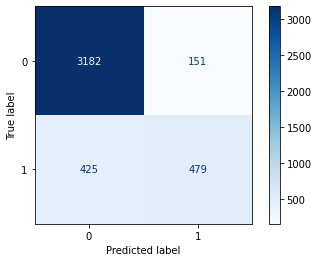

In [11]:
#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_test, y_pred)

### Obter as features mais importantes

In [12]:
df_featImport = pd.DataFrame(columns=['feature', 'feat_importance'])

In [13]:
df_featImport['feature'] = X_test.columns
df_featImport['feat_importance'] = clf.feature_importances_
df_featImport = df_featImport.sort_values(by='feat_importance', ascending=False)
df_featImport[0:10]

,feature,feat_importance
7,var8,0.081255
6,var7,0.080238
3,var4,0.074881
49,var50,0.022376
5,var6,0.021249
53,var54,0.020344
0,var1,0.018160
22,var23,0.017895
55,var56,0.017639
13,var14,0.016097


## Testar o modelo na base de teste

In [14]:
# Carregar a base de teste
raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()

In [15]:
# Remover coluna ID
df_test.drop(['id'], axis=1, inplace=True)

In [16]:
# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = clf.predict(X_test)

## Criar arquivo para submissão

In [17]:
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,1
3,7,0
4,15,1


In [18]:
df_submission['predicted'] = y_pred
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,0
3,7,0
4,15,0


In [19]:
# Salvar o arquivo para submissão
df_submission.to_csv('./output/benchmarkunbalaced.csv', index=False, sep=",", encoding='utf-8')

## Segunda abordagem - Balanceada
Treinar modelos balanceando a base.
70% para treinamento - 30% para validação

In [20]:
# definindo os recuros de entrada(X) e saida(y)
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']

In [21]:
# executa o balanceamento usando a técnica SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [22]:
# realiza a contagem das classes
contagem = Counter(y)
print(contagem)

Counter({1: 11273, 0: 11273})


In [23]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=42)

In [24]:
# Treinar um modelo usando um algoritmo de árvore de decisão  que utiliza uma estrutura de Gradient Boosting
clf2 = XGBClassifier(n_estimators = 650,
                     max_depth = 10,
                     learning_rate = 0.01,
                     subsample = 1,
                     random_state=42)
clf2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=650,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
# fazendo a predição com os dados de teste
y_pred = clf2.predict(X_test)

Accuracy: 0.913217031342401

F1-score: 0.9119808067176487

Confusion Matrix: 
Predicted     0     1
Actual               
0          3136   194
1           393  3041

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3330
           1       0.94      0.89      0.91      3434

    accuracy                           0.91      6764
   macro avg       0.91      0.91      0.91      6764
weighted avg       0.91      0.91      0.91      6764



C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


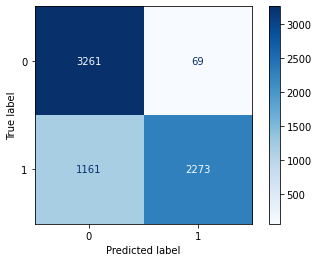

In [26]:
#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_test, y_pred)

In [27]:
#Obter as features mais importantes
df_featImport['feature'] = X_test.columns
df_featImport['feat_importance'] = clf2.feature_importances_
df_featImport = df_featImport.sort_values(by='feat_importance', ascending=False)
df_featImport[0:10]

,feature,feat_importance
22,var8,0.235079
0,var7,0.062907
49,var4,0.041443
67,var49,0.033127
41,var54,0.032498
47,var50,0.031591
7,var1,0.026211
16,var57,0.023345
27,var17,0.020872
56,var18,0.019737


## Testar o modelo na base de teste

In [28]:
# Carregar a base de teste
raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()

In [29]:
# Remover coluna ID
df_test.drop(['id'], axis=1, inplace=True)

In [30]:
# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = clf2.predict(X_test)

## Criar arquivo para submissão

In [31]:
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()
df_submission['predicted'] = y_pred
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,0
3,7,0
4,15,0


In [32]:
# Salvar o arquivo para submissão
df_submission.to_csv('./output/xgboostbalaced.csv', index=False, sep=",", encoding='utf-8')

## Outros algoritmos

### kNN

#### Desbalanceado

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3333
           1       0.63      0.39      0.48       904

    accuracy                           0.82      4237
   macro avg       0.74      0.67      0.69      4237
weighted avg       0.80      0.82      0.80      4237

Accuracy: 0.820627802690583

F1-score: 0.483695652173913

Confusion Matrix: 
Predicted     0    1
Actual              
0          3121  212
1           548  356

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3333
           1       0.63      0.39      0.48       904

    accuracy                           0.82      4237
   macro avg       0.74      0.67      0.69      4237
weighted avg       0.80      0.82      0.80      4237



C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


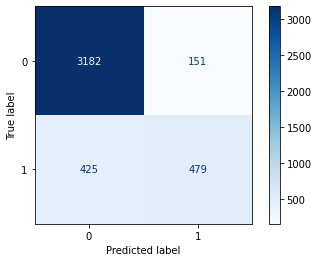

In [33]:
# definindo os recuros de entrada(X) e saida(y)
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
generate_performance_stats(y_test, y_pred)

raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()
df_test.drop(['id'], axis=1, inplace=True)

# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = knn.predict(X_test)
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()
df_submission['predicted'] = y_pred
df_submission.head()
# Salvar o arquivo para submissão
df_submission.to_csv('./output/unbalancedknn.csv', index=False, sep=",", encoding='utf-8')


#### Balanceado

Counter({1: 11273, 0: 11273})
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      3330
           1       0.76      0.93      0.83      3434

    accuracy                           0.81      6764
   macro avg       0.83      0.81      0.81      6764
weighted avg       0.83      0.81      0.81      6764

Accuracy: 0.8122412773506801

F1-score: 0.8339435146443515

Confusion Matrix: 
Predicted     0     1
Actual               
0          2305  1025
1           245  3189

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      3330
           1       0.76      0.93      0.83      3434

    accuracy                           0.81      6764
   macro avg       0.83      0.81      0.81      6764
weighted avg       0.83      0.81      0.81      6764



C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


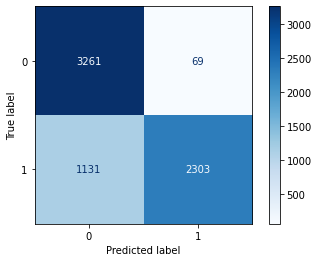

In [34]:


# definindo os recuros de entrada(X) e saida(y)
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']
# executa o balanceamento usando a técnica SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# realiza a contagem das classes
contagem = Counter(y)
print(contagem)

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_test, y_pred)

raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()
df_test.drop(['id'], axis=1, inplace=True)

# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = knn.predict(X_test)
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()
df_submission['predicted'] = y_pred
df_submission.head()
# Salvar o arquivo para submissão
df_submission.to_csv('./output/balancedknn.csv', index=False, sep=",", encoding='utf-8')

## Regresão logística
### desbalanceado

C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(4237,)
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3333
           1       0.71      0.36      0.48       904

    accuracy                           0.83      4237
   macro avg       0.78      0.66      0.69      4237
weighted avg       0.82      0.83      0.81      4237

Accuracy: 0.8321925890960585

F1-score: 0.4752767527675277

Confusion Matrix: 
Predicted     0    1
Actual              
0          3204  129
1           582  322

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3333
           1       0.71      0.36      0.48       904

    accuracy                           0.83      4237
   macro avg       0.78      0.66      0.69      4237
weighted avg       0.82      0.83      0.81      4237



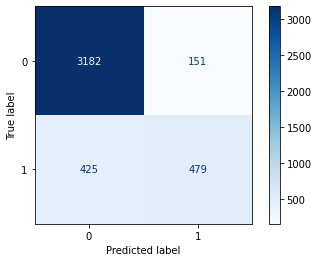

In [35]:
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=42)


# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X, y)
# Fazendo a predição nos dados de treino
y_pred = clr.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test, y_pred))
#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_test, y_pred)

raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()
df_test.drop(['id'], axis=1, inplace=True)

# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = clr.predict(X_test)
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()
df_submission['predicted'] = y_pred
df_submission.head()
# Salvar o arquivo para submissão
df_submission.to_csv('./output/unbalancedLogisticRegression.csv', index=False, sep=",", encoding='utf-8')

### Balanceado

Counter({1: 11273, 0: 11273})


C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.80      0.77      3330
           1       0.79      0.72      0.76      3434

    accuracy                           0.76      6764
   macro avg       0.77      0.76      0.76      6764
weighted avg       0.77      0.76      0.76      6764

Accuracy: 0.7633057362507392

F1-score: 0.7562052687680828

Confusion Matrix: 
Predicted     0     1
Actual               
0          2680   650
1           951  2483

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      3330
           1       0.79      0.72      0.76      3434

    accuracy                           0.76      6764
   macro avg       0.77      0.76      0.76      6764
weighted avg       0.77      0.76      0.76      6764



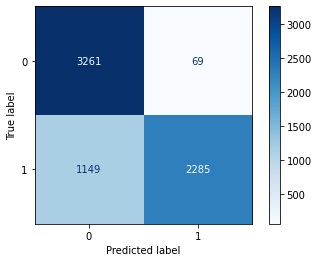

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# definindo os recuros de entrada(X) e saida(y)
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']
# executa o balanceamento usando a técnica SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# realiza a contagem das classes
contagem = Counter(y)
print(contagem)

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    shuffle=True,
                                                    random_state=42)


# Criando modelo e treinando com os dados de treino
clr = LogisticRegression(max_iter=1000)
clr.fit(X, y)
# Fazendo a predição nos dados de treino
y_pred = clr.predict(X_test)
print(classification_report(y_test, y_pred))
#Avaliar o modelo com base em algumas métricas de desempenho
generate_performance_stats(y_test, y_pred)

raw_data_test = pd.read_csv('./input/test.csv', sep=',')
df_test = raw_data_test.copy()
df_test.drop(['id'], axis=1, inplace=True)

# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_test = df_test
y_pred = clr.predict(X_test)
df_submission = pd.read_csv('./input/submission_sample.csv', sep=',')
df_submission.head()
df_submission['predicted'] = y_pred
df_submission.head()
# Salvar o arquivo para submissão
df_submission.to_csv('./output/balancedLogisticRegression.csv', index=False, sep=",", encoding='utf-8')